In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

In [3]:

# Download latest version
path = kagglehub.dataset_download("yuanchunhong/university-football-injury-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 83.9k/83.9k [00:00<00:00, 803kB/s]

Extracting files...
Path to dataset files: /Users/santiagoaristizabal/.cache/kagglehub/datasets/yuanchunhong/university-football-injury-prediction-dataset/versions/2


In [7]:
print(os.listdir(path))

['data.csv']


In [9]:
df = pd.read_csv(os.path.join(path, "data.csv"))

df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


# Analisis Inicial


In [10]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.135000,177.407500,73.235000,9.951150,22.332500,1.536250,74.933249,79.154123,249.423244,83.832337,5.949025,78.341311,7.417124,54.039342,74.382174,0.597500,0.500000,23.377364
std,1.991037,7.148974,9.929276,2.610395,10.311516,1.292584,6.672704,6.782332,22.532387,6.931657,0.329133,8.775418,0.793183,11.421143,9.324899,0.490708,0.500313,3.673279
min,18.000000,154.000000,45.000000,5.000000,5.000000,0.000000,52.391351,58.180381,180.000000,60.059484,4.862435,50.000000,5.000000,21.561186,50.000000,0.000000,0.000000,14.346326
25%,19.000000,173.000000,66.000000,8.127151,13.000000,1.000000,70.432656,74.495959,234.089585,79.044910,5.732552,72.675392,6.850062,45.775371,67.809084,0.000000,0.000000,20.786644
50%,21.000000,177.000000,73.000000,9.895710,22.000000,1.000000,74.997933,79.187909,249.127328,84.156236,5.937692,78.340973,7.424618,54.047208,74.363878,1.000000,0.500000,23.130560
75%,23.000000,182.000000,80.000000,11.535140,32.000000,2.000000,79.632391,83.813179,265.105082,88.877902,6.159205,84.093489,7.988100,61.910804,80.502613,1.000000,1.000000,26.024182
max,24.000000,200.000000,105.000000,18.866608,39.000000,8.000000,93.900051,100.000000,306.730851,100.000000,6.898228,100.000000,9.860553,87.065007,100.000000,1.000000,1.000000,36.262439


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

In [12]:
df.dtypes

Age                             int64
Height_cm                       int64
Weight_kg                       int64
Position                       object
Training_Hours_Per_Week       float64
Matches_Played_Past_Season      int64
Previous_Injury_Count           int64
Knee_Strength_Score           float64
Hamstring_Flexibility         float64
Reaction_Time_ms              float64
Balance_Test_Score            float64
Sprint_Speed_10m_s            float64
Agility_Score                 float64
Sleep_Hours_Per_Night         float64
Stress_Level_Score            float64
Nutrition_Quality_Score       float64
Warmup_Routine_Adherence        int64
Injury_Next_Season              int64
BMI                           float64
dtype: object

In [14]:
columns = df.columns

In [15]:
columns

Index(['Age', 'Height_cm', 'Weight_kg', 'Position', 'Training_Hours_Per_Week',
       'Matches_Played_Past_Season', 'Previous_Injury_Count',
       'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms',
       'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score',
       'Sleep_Hours_Per_Night', 'Stress_Level_Score',
       'Nutrition_Quality_Score', 'Warmup_Routine_Adherence',
       'Injury_Next_Season', 'BMI'],
      dtype='object')

# Univariado

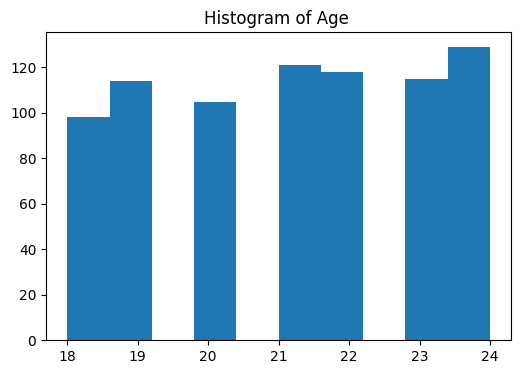

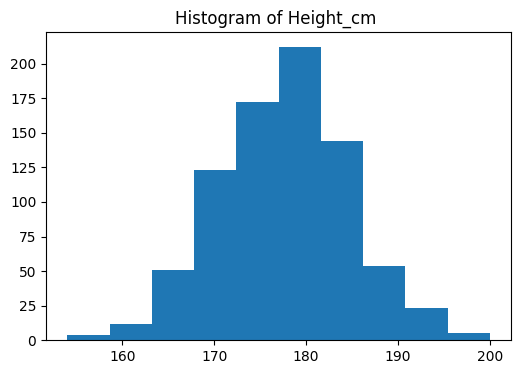

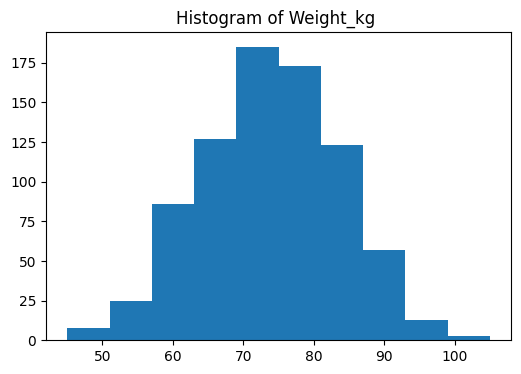

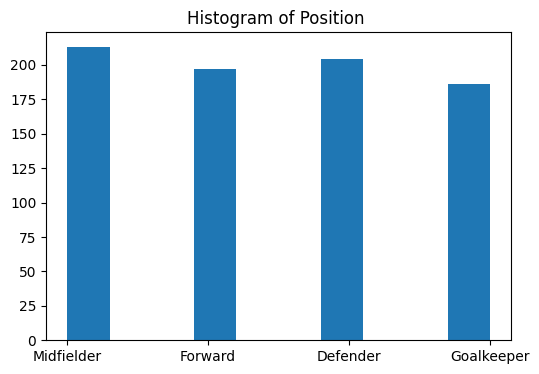

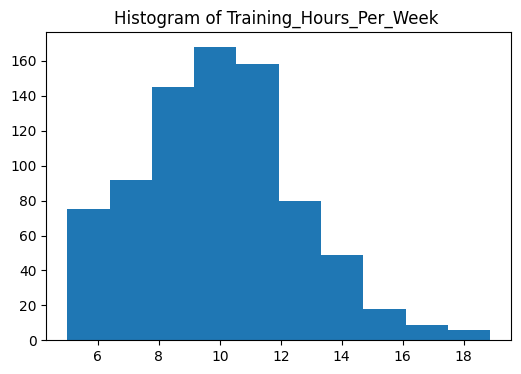

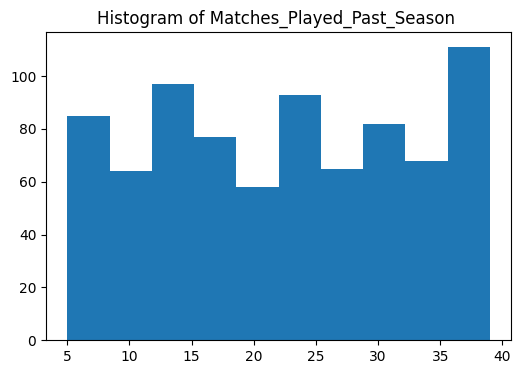

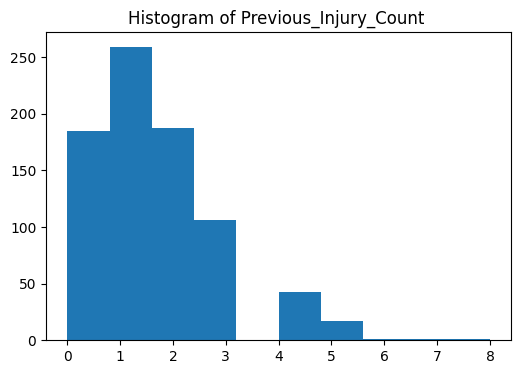

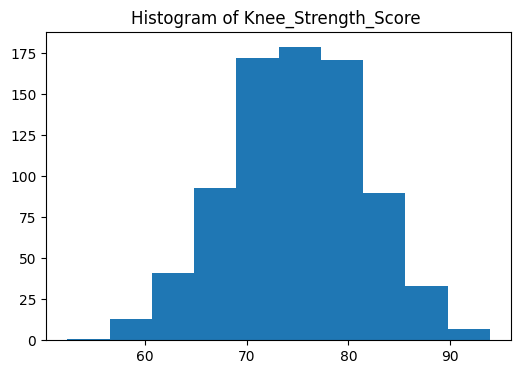

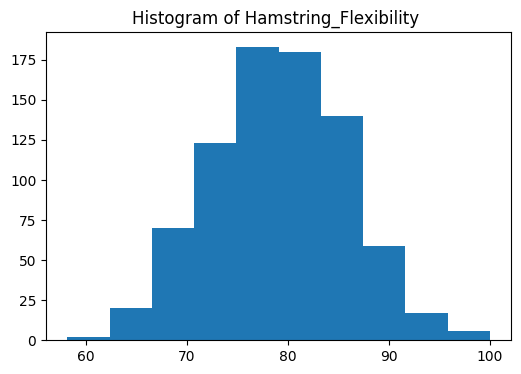

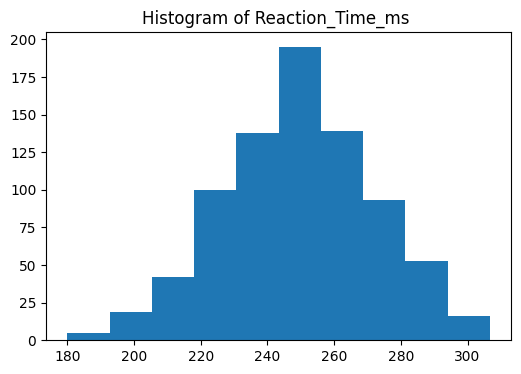

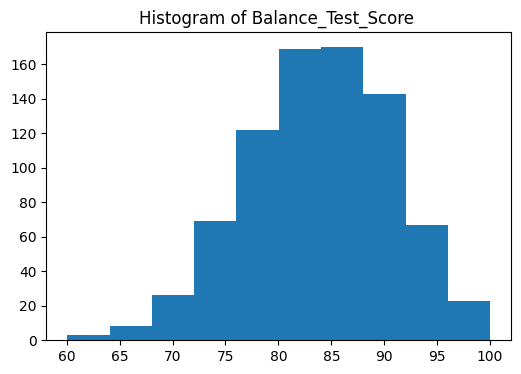

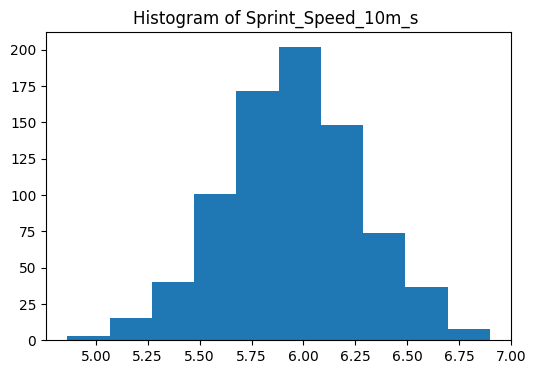

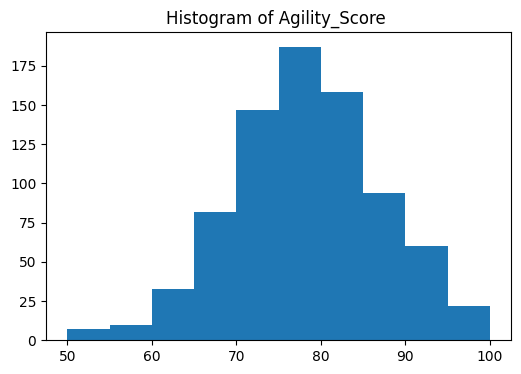

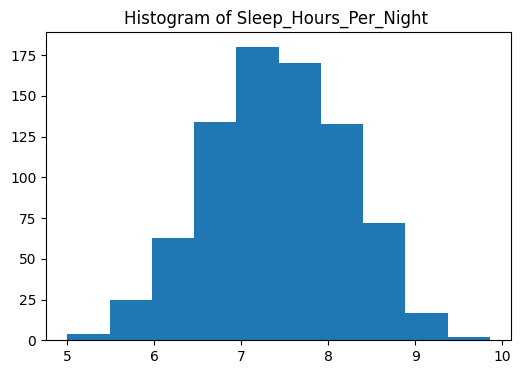

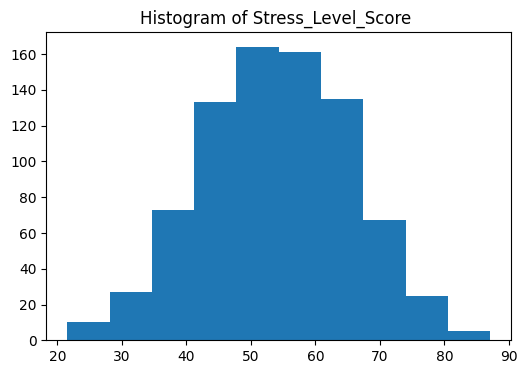

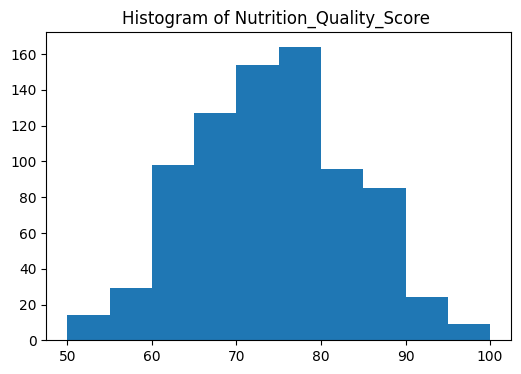

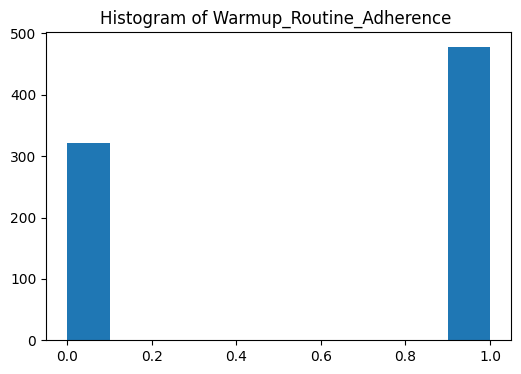

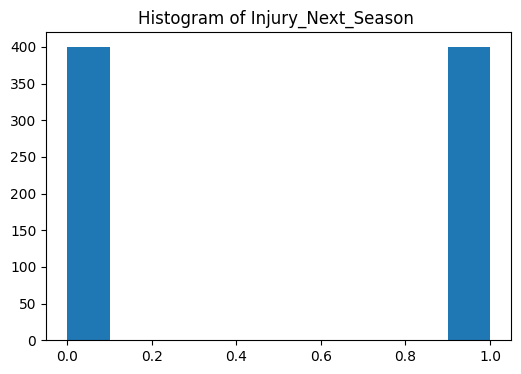

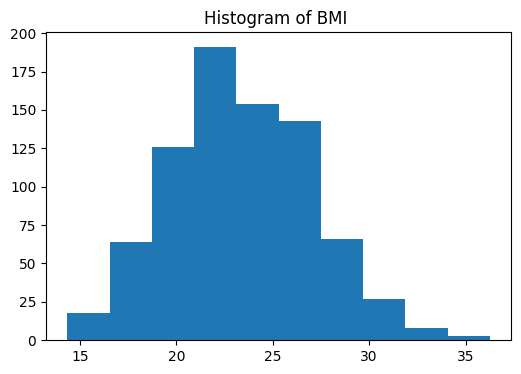

In [28]:
for col in df.columns: 
    plt.figure(figsize=(6,4))
    plt.hist(df[col])
    plt.title(f"Histogram of {col} ")
    plt.show()

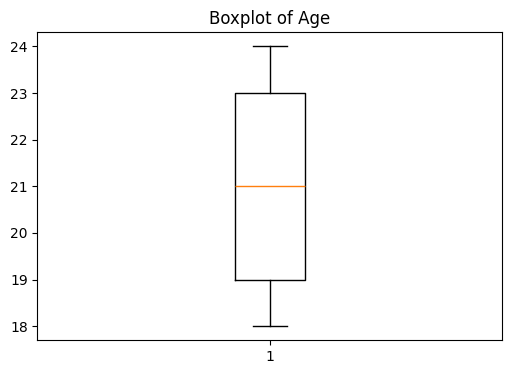

Skewness: -0.06784210990864813
Kurtosis: -1.2333285101842255


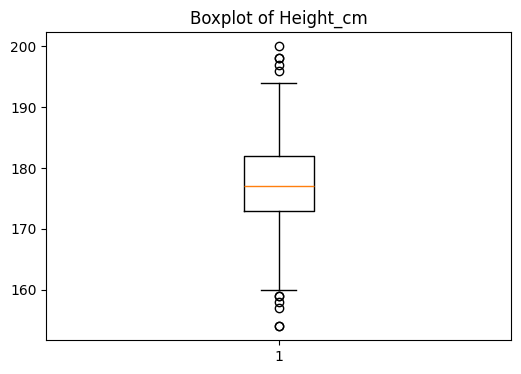

Skewness: 0.007111577149228727
Kurtosis: -0.009867747044285835


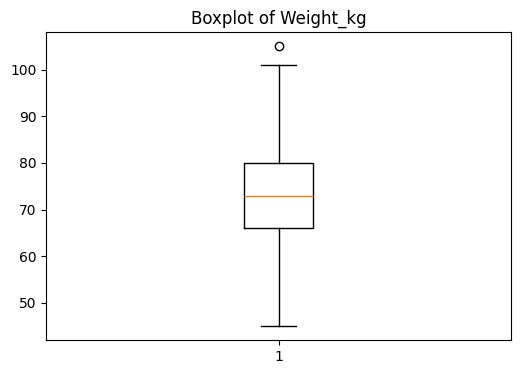

Skewness: -0.047035865441684664
Kurtosis: -0.21169244253299535
Skipping Position (dtype=object)


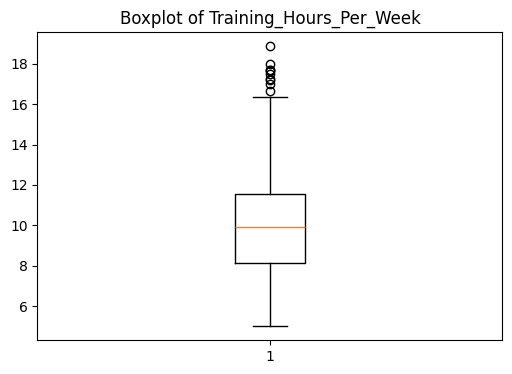

Skewness: 0.3147108775926885
Kurtosis: 0.03631267748338507


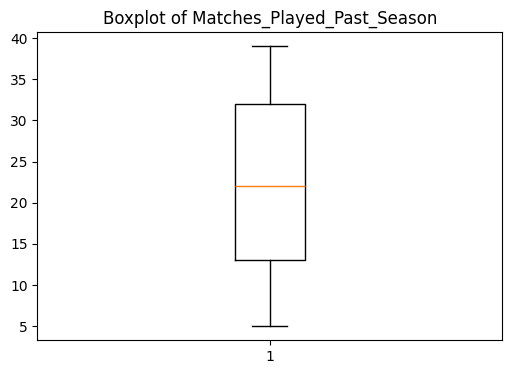

Skewness: 0.00020991019450423146
Kurtosis: -1.2196696160928848


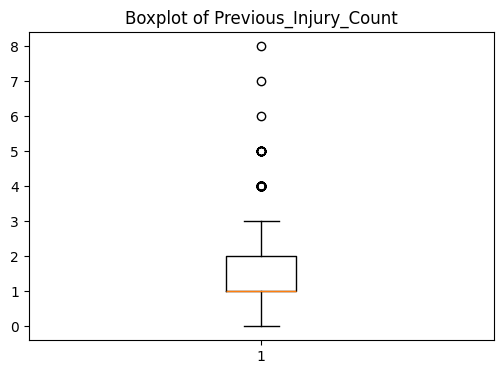

Skewness: 0.8784676824816575
Kurtosis: 0.8791043022625029


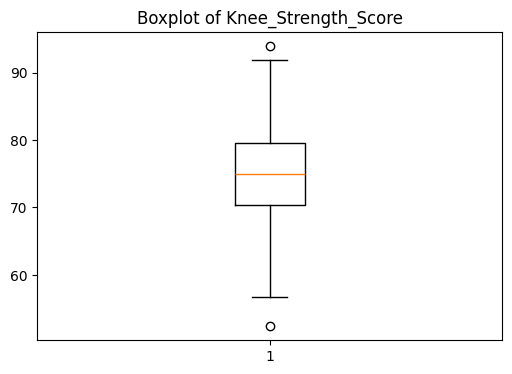

Skewness: -0.12190900836284817
Kurtosis: -0.19795448292208961


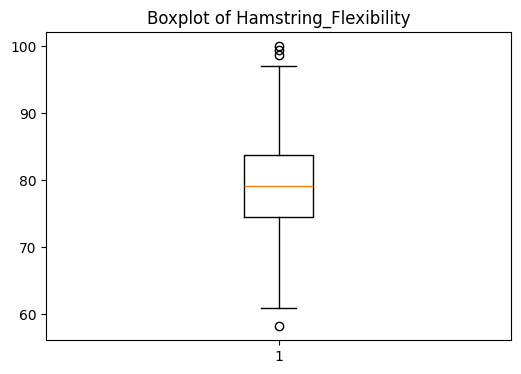

Skewness: 0.052615645163100626
Kurtosis: -0.10852670145912491


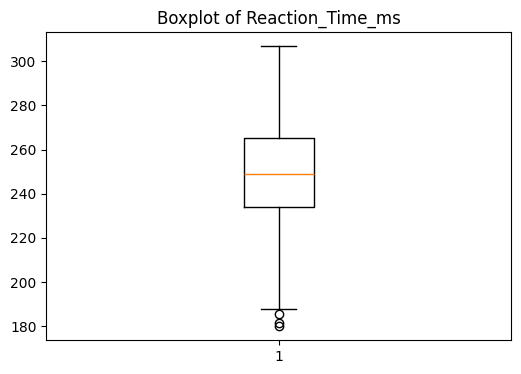

Skewness: -0.08833675546266975
Kurtosis: -0.1344043567797537


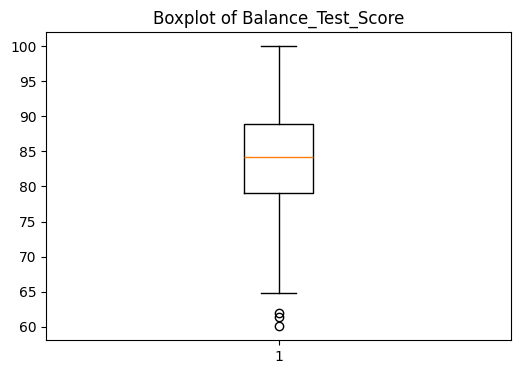

Skewness: -0.22700907889199948
Kurtosis: -0.09331893094369059


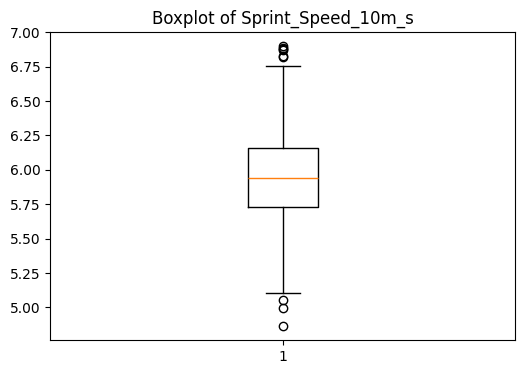

Skewness: 0.08638256133704174
Kurtosis: 0.07080264873876896


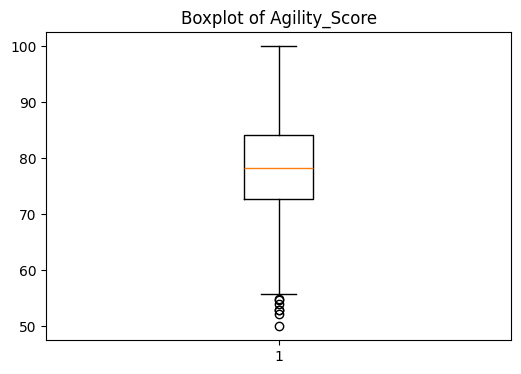

Skewness: -0.10986049153072022
Kurtosis: 0.01893695045462307


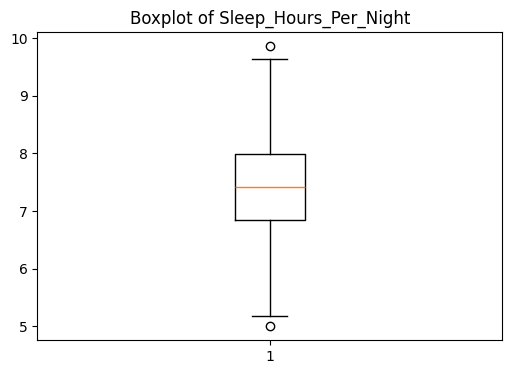

Skewness: -0.08322108076273745
Kurtosis: -0.31823477751588625


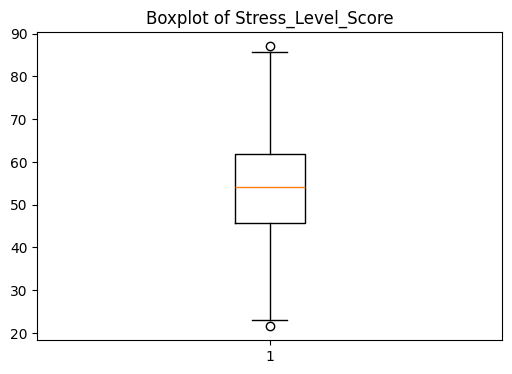

Skewness: -0.029559032319391654
Kurtosis: -0.24030775682486594


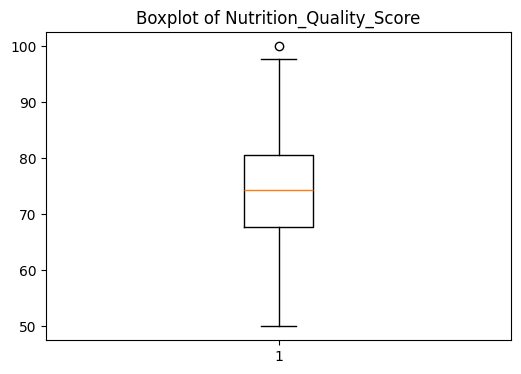

Skewness: 0.01464808082474299
Kurtosis: -0.39509214824881145


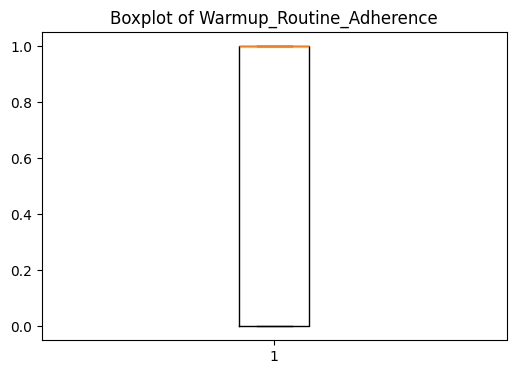

Skewness: -0.39838062260225826
Kurtosis: -1.8459139366578368


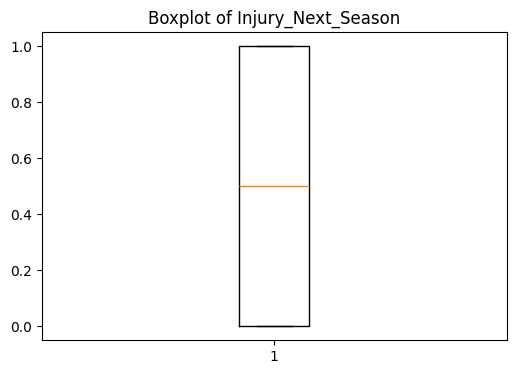

Skewness: 0.0
Kurtosis: -2.005018820577164


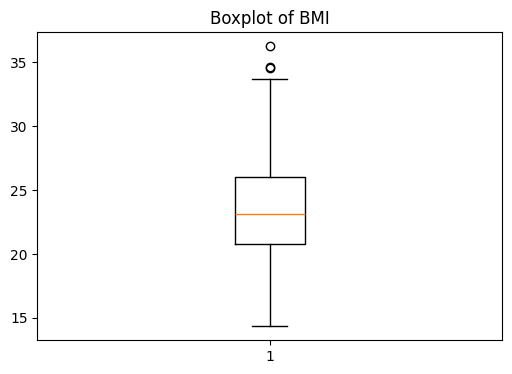

Skewness: 0.1999468796194161
Kurtosis: -0.14835390538924775


In [29]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):  
        plt.figure(figsize=(6,4))
        plt.boxplot(df[col].dropna())
        plt.title(f"Boxplot of {col}")
        plt.show()
        print(f"Skewness: {df[col].skew()}")
        print(f"Kurtosis: {df[col].kurt()}")
    else:
        print(f"Skipping {col} (dtype={df[col].dtype})")

# Bivariado

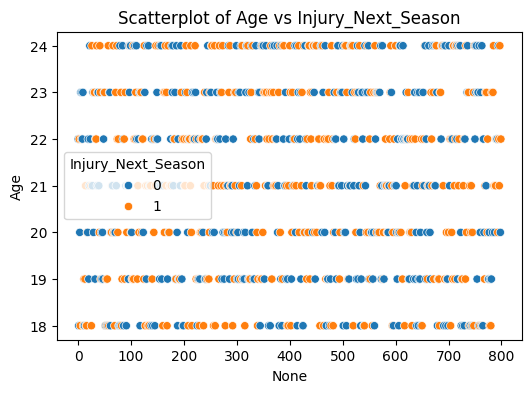

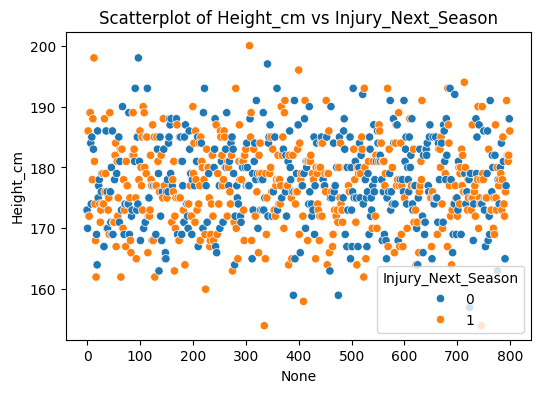

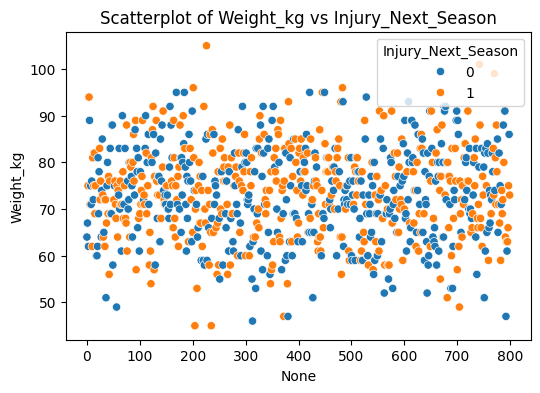

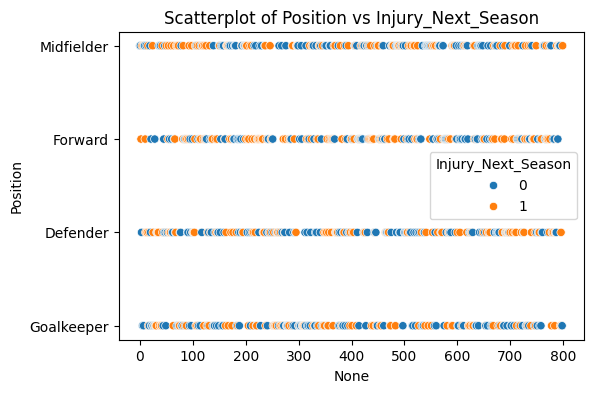

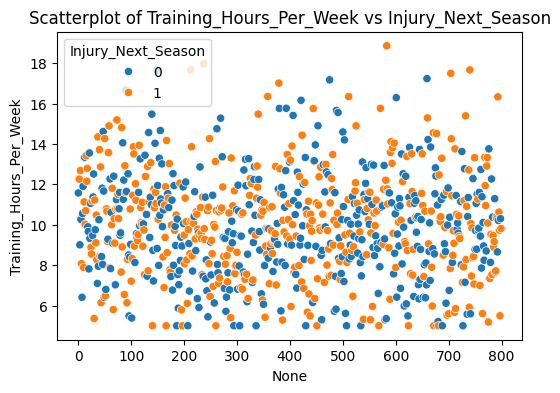

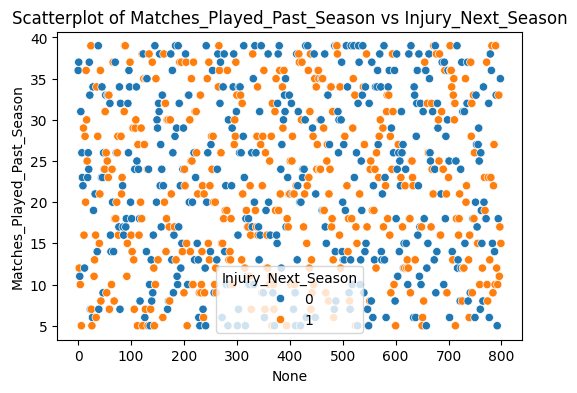

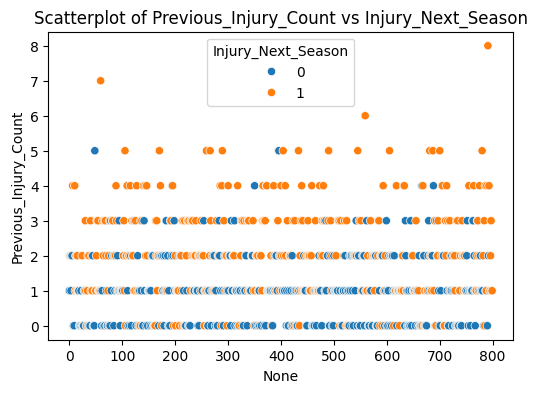

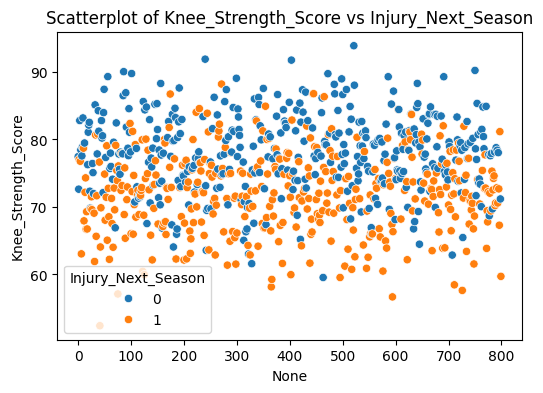

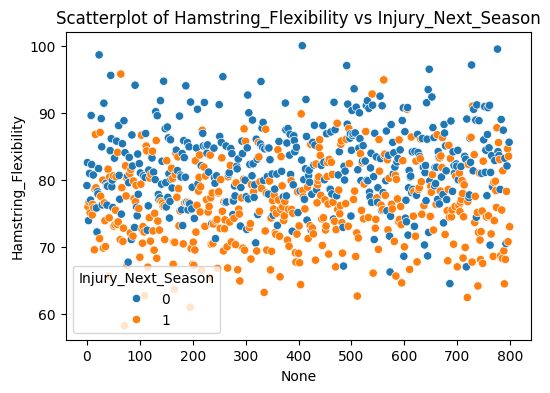

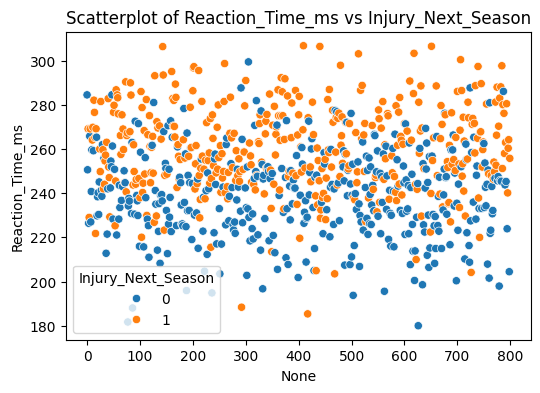

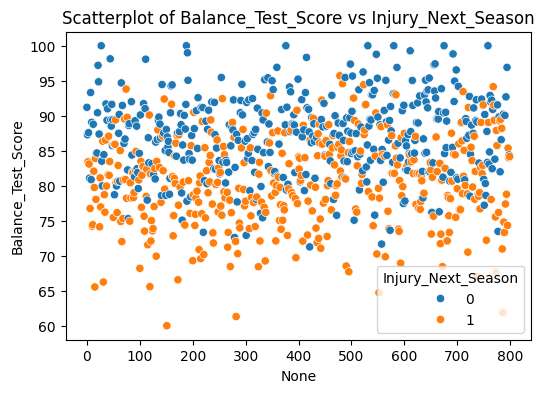

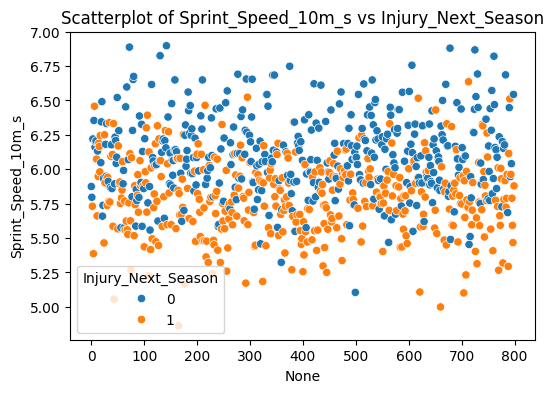

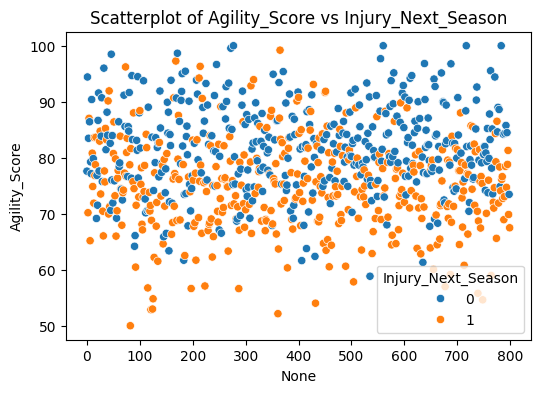

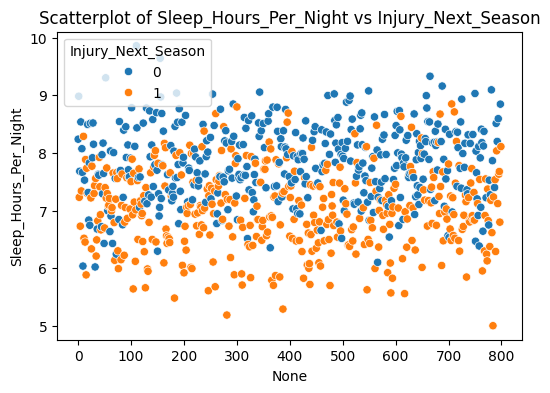

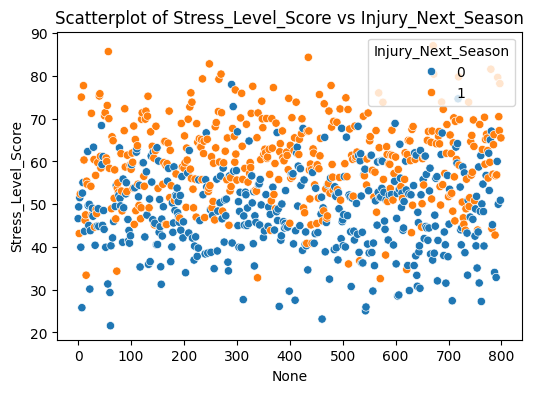

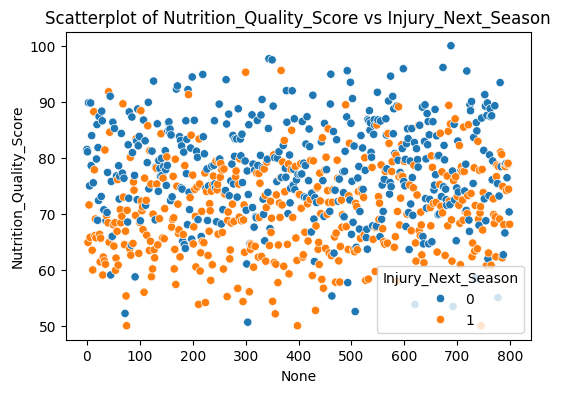

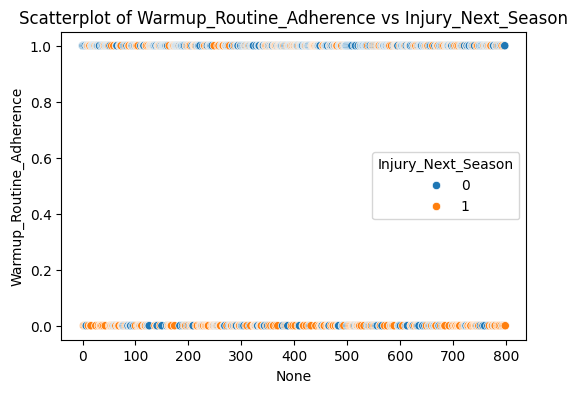

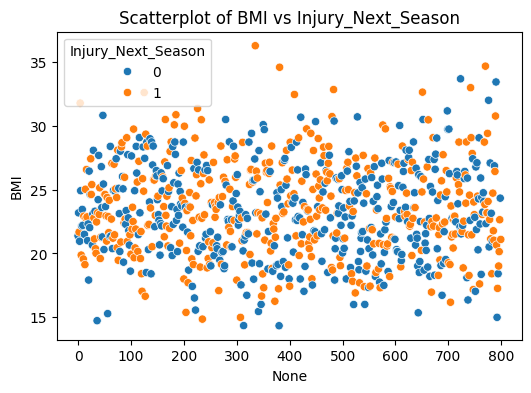

In [27]:
for col in df.columns:
    if col != "Injury_Next_Season": 
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df.index, y=df[col], hue=df['Injury_Next_Season'])
        plt.title(f"Scatterplot of {col} vs Injury_Next_Season")
        plt.show()

In [48]:
df["position_encoded"] = df["Position"].astype("category").cat.codes

In [50]:
df.head()
df = df.drop('Position', axis=1)

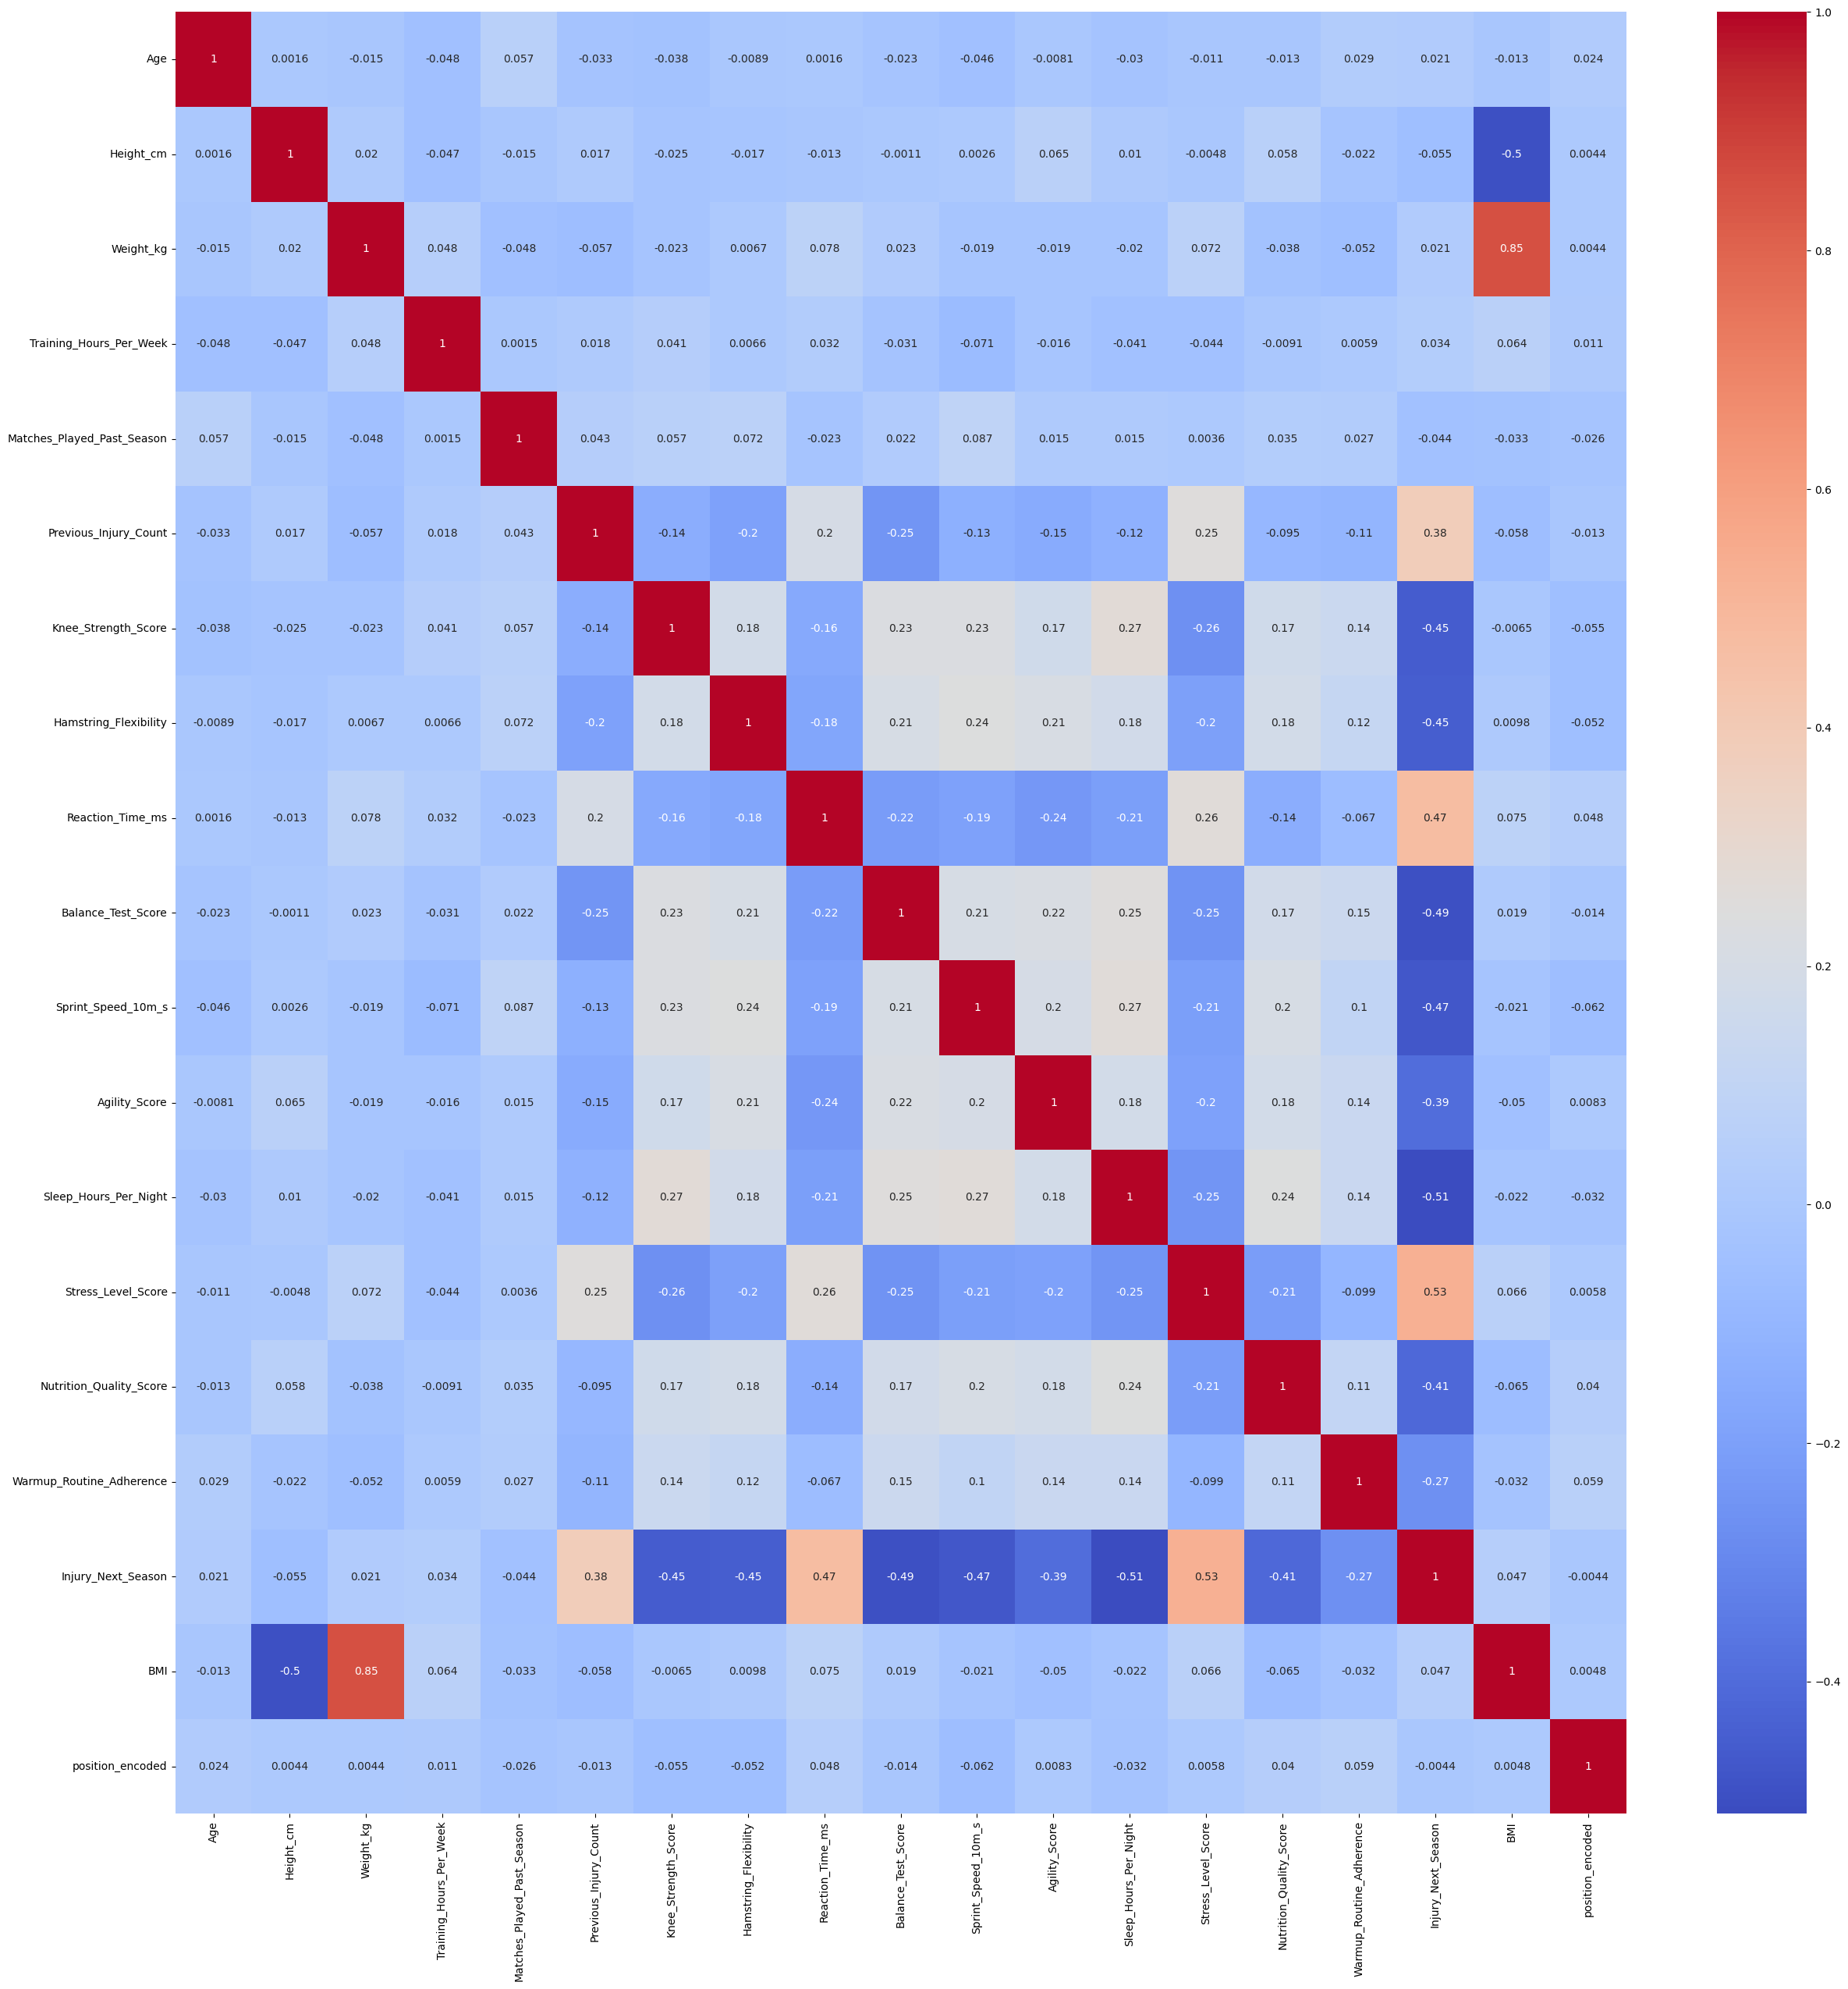

In [51]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()